In [2]:
from __future__ import print_function

import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.io import loadmat
from scipy.fftpack import fft
from scipy.io import wavfile 

import madmom 
import sounddevice as sd

from pathlib import Path
import numpy, scipy, matplotlib.pyplot as plt, sklearn, urllib, IPython.display as ipd
import librosa, librosa.display
import stanford_mir; stanford_mir.init()

import loading as load
import seaborn as sns
a=load.loadAudioArrays()

kick_signals=a["kicks"]
snare_signals=a["snares"]
clap_signals=a["claps"]
feat_cols=[]

loading


/home/amir/mir/t-sne/samples
loading


/home/amir/mir/t-sne/samples/claps
loading


/home/amir/mir/t-sne/samples/snares
loading


/home/amir/mir/t-sne/samples/kicks
loading


/home/amir/mir/t-sne/samples/rims
loading


/home/amir/mir/t-sne/samples/sines


In [3]:
def getOnsetDF(signals,t="u"):
    def getOnsets(x):
        spec = madmom.audio.spectrogram.Spectrogram(x, frame_size=400, hop_size=10)
        X=madmom.features.onsets.high_frequency_content(spec)
        return X 
    onsets=[]
    for s in signals:
        onset=getOnsets(s)
        onsets.append(onset[0:300])
    
    df=pd.DataFrame(onsets)
    global feat_cols
    feat_cols=[ 'onset'+str(i) for i in range(df.shape[1])]
    df.columns=feat_cols
    df["label"]=t
    return df

df=pd.DataFrame()
for key,signals in a.items():
    chunk=getOnsetDF(signals,t=key)
    df=pd.concat([df,chunk])

df=df.fillna(0)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 117 samples in 0.001s...
[t-SNE] Computed neighbors for 117 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 117 / 117
[t-SNE] Mean sigma: 133.877407
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.594021
[t-SNE] KL divergence after 1050 iterations: 0.354056
t-SNE done! Time elapsed: 5.6743621826171875e-05 seconds


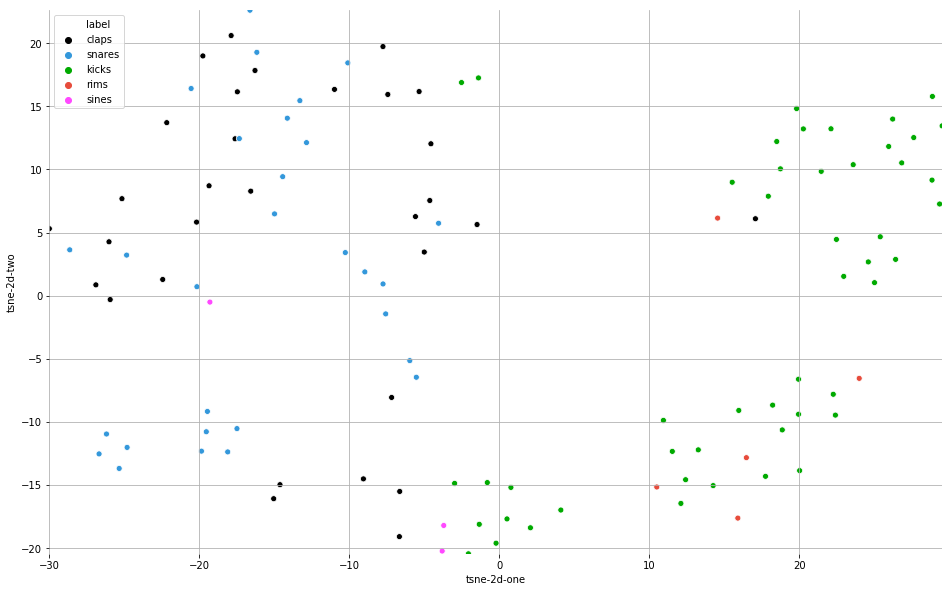

In [5]:
# rndperm = np.random.permutation(df.shape[0])

#t-sne
df_subset=df
data_subset=df[feat_cols].values
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=3000)
tsne_results = tsne.fit_transform(data_subset)
time_start = time.time()
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))

flatui = ["#000000", "#3498db", "#00AA00", "#e74c3c", "#FF49FF", "#2ecc71"]
sns.set_palette(sns.color_palette(flatui))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    data=df_subset,
    legend="full",
    alpha=1
)
plt.show()

Lets try other feature extraction methods


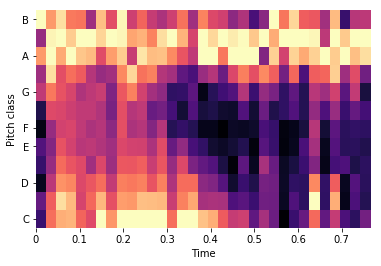

In [19]:
def getZeroCrossings(signals,t="u"):
    def getZC(x):        
        X=librosa.feature.zero_crossing_rate(x)
        return X 
    onsets=[]
    for s in signals:
        onset=getZC(s)
        onsets.append(onset[0:300])
    
    df=pd.DataFrame(onsets)
    global feat_cols
    feat_cols=[ 'onset'+str(i) for i in range(df.shape[1])]
    df.columns=feat_cols
    df["label"]=t
    return df

df=df.fillna(0)
y=a["rims"][4]
sr=44000
librosa.display.specshow(librosa.feature.chroma_cqt(y, sr=sr),
y_axis='chroma', x_axis='time')
plt.show()
sd.play(y,blocksize=2000)
